# Filtro Gussiano

### Hi,j = 1/2Pi*sigma^2 exp(- [(i-(k+1)))^2+(j-(k+1)^2)]/2sigma^2)

In [3]:
import math
import numpy as np
sigma=1
HFactor=1/(2*math.pi*pow(sigma,2))
k=2
H=np.zeros((2*k+1,2*k+1))
for i in range(2*k+1):
    for j in range(2*k+1):
        H[i,j]=HFactor*math.exp(-1*((pow((i+1)-(k+1),2)+pow((j+1)-(k+1),2)))/(2*pow(sigma,2)))
print(H)
dimesion=5
k=int((dimesion-1)/2)
fila_k = np.linspace(-k, k, 5)
x,y = np.meshgrid(fila_k,fila_k)
factor_kernel=1/(2*math.pi*pow(sigma,2))
matrix_kernel = -1*(pow(x,2)+pow(y,2))/(2*pow(sigma,2))
gussian_kernel = factor_kernel*np.exp(matrix_kernel)
print(gussian_kernel)

[[0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.02153928 0.09653235 0.15915494 0.09653235 0.02153928]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]]
[[0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.02153928 0.09653235 0.15915494 0.09653235 0.02153928]
 [0.01306423 0.05854983 0.09653235 0.05854983 0.01306423]
 [0.00291502 0.01306423 0.02153928 0.01306423 0.00291502]]


### Validacion Kernel

In [4]:
import numpy as np
import scipy.stats as st
def gkern(l=5, sig=1.):
    """\
    creates gaussian kernel with side length l and a sigma of sig
    """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)
print(gkern(l=5,sig=1))

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


In [5]:
def crear_kernel_gussiano(k=3, sigma=1):    
    dimesion = 2*k+1
    fila_k = np.linspace(-k, k, dimesion)
    x,y = np.meshgrid(fila_k,fila_k)
    factor_kernel=1/(2*math.pi*pow(sigma,2))
    matriz_kernel = -1*(pow(x,2)+pow(y,2))/(2*pow(sigma,2))
    gussian_kernel = factor_kernel*np.exp(matriz_kernel)
    return gussian_kernel
print(crear_kernel_gussiano(3,1))
print(crear_kernel_gussiano(5,0.9))

[[1.96412803e-05 2.39279779e-04 1.07237757e-03 1.76805171e-03
  1.07237757e-03 2.39279779e-04 1.96412803e-05]
 [2.39279779e-04 2.91502447e-03 1.30642333e-02 2.15392793e-02
  1.30642333e-02 2.91502447e-03 2.39279779e-04]
 [1.07237757e-03 1.30642333e-02 5.85498315e-02 9.65323526e-02
  5.85498315e-02 1.30642333e-02 1.07237757e-03]
 [1.76805171e-03 2.15392793e-02 9.65323526e-02 1.59154943e-01
  9.65323526e-02 2.15392793e-02 1.76805171e-03]
 [1.07237757e-03 1.30642333e-02 5.85498315e-02 9.65323526e-02
  5.85498315e-02 1.30642333e-02 1.07237757e-03]
 [2.39279779e-04 2.91502447e-03 1.30642333e-02 2.15392793e-02
  1.30642333e-02 2.91502447e-03 2.39279779e-04]
 [1.96412803e-05 2.39279779e-04 1.07237757e-03 1.76805171e-03
  1.07237757e-03 2.39279779e-04 1.96412803e-05]]
[[7.74790767e-15 2.00415616e-12 1.50838656e-10 3.30314562e-09
  2.10463487e-08 3.90175302e-08 2.10463487e-08 3.30314562e-09
  1.50838656e-10 2.00415616e-12 7.74790767e-15]
 [2.00415616e-12 5.18416338e-10 3.90175302e-08 8.54426761

In [6]:
import numpy as np 
import math
def generar_imagen_convolucion(imagen,matriz_kernel):    
    (numero_filas_imagen,numero_columnas_imagen)=imagen.shape
    (numero_filas_kernel,numero_columnas_kernel)=matriz_kernel.shape
    dimesion_fila=int(numero_filas_kernel/2)
    dimesion_columna=int(numero_columnas_kernel/2)
    imagen_ceros=agrear_dimensiones_ceros(imagen,dimesion_fila,dimesion_columna)
    imagen_convolucion = np.zeros((numero_filas_imagen,numero_columnas_imagen)) 
    (numero_filas_ceros,numero_columnas_ceros)=imagen_ceros.shape
    k=0
    l=0    
    for i in range(dimesion_fila,numero_filas_imagen+dimesion_fila):
        l=0
        for j in range(dimesion_columna,numero_columnas_imagen+dimesion_columna):
            sub_matriz_imagen = imagen_ceros[i-dimesion_fila:i+dimesion_fila+1,j-dimesion_columna:j+dimesion_columna+1]
            matriz_filtro_gussiano = matriz_kernel.dot(sub_matriz_imagen)
            suma = np.sum(matriz_filtro_gussiano)
            imagen_convolucion[k,l]=suma
            l=l+1
        k=k+1        
    return imagen_convolucion


def agrear_dimensiones_ceros(imagen,dimesion_fila,dimesion_columna):    
    (numero_filas,numero_columnas)=imagen.shape 
    total_filas=numero_filas+2*dimesion_fila
    total_columnas=numero_columnas+2*dimesion_columna
    imagen_ceros = np.zeros((total_filas,total_columnas)) 
    imagen_ceros[dimesion_fila:numero_filas+dimesion_fila,dimesion_columna:numero_columnas+dimesion_columna] = imagen[0:numero_filas,0:numero_columnas]
    return imagen_ceros

In [7]:
import skimage.io as io
imagen = io.imread(fname="images/imageonline-co-blackandwhiteimage.jpg",as_gray=True)

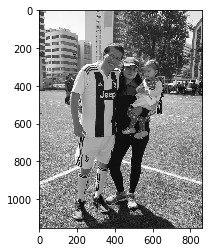

In [8]:
import matplotlib.pyplot as plt
plt.imshow(imagen,cmap=plt.cm.gray)
plt.show()

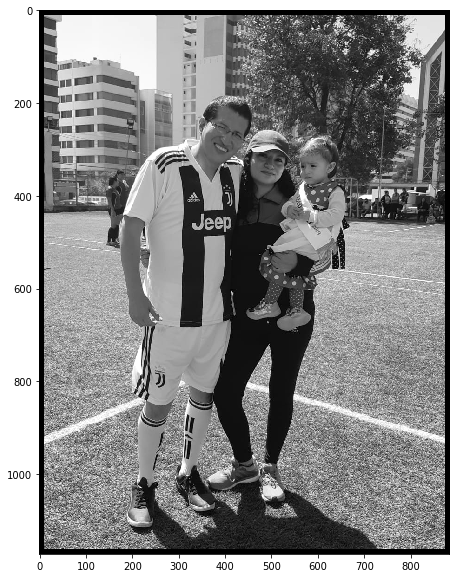

In [9]:
imagen_ceros=agrear_dimensiones_ceros(imagen,10,10)
fig,ax=plt.subplots(figsize=[10,10])
ax.imshow(imagen_ceros,cmap=plt.cm.gray)
plt.show()

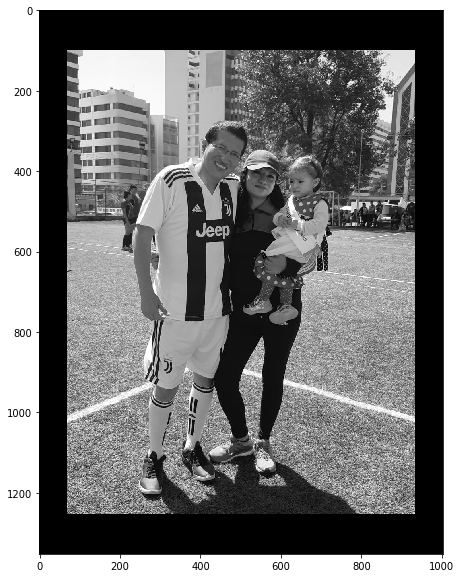

In [10]:
imagen_ceros=agrear_dimensiones_ceros(imagen,100,70)
fig,ax=plt.subplots(figsize=[10,10])
ax.imshow(imagen_ceros,cmap=plt.cm.gray)
plt.show()

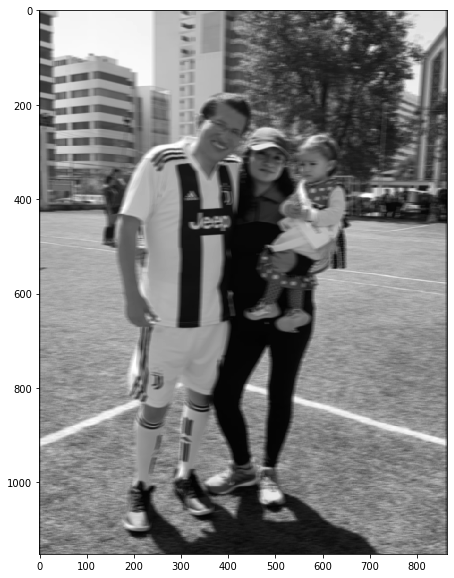

In [11]:
matriz_gussiana=crear_kernel_gussiano(5,1)
imagen_convolucion_gussiana = generar_imagen_convolucion(imagen,matriz_gussiana)
fig,ax=plt.subplots(figsize=[10,10])
ax.imshow(imagen_convolucion_gussiana,cmap=plt.cm.gray)
plt.show()

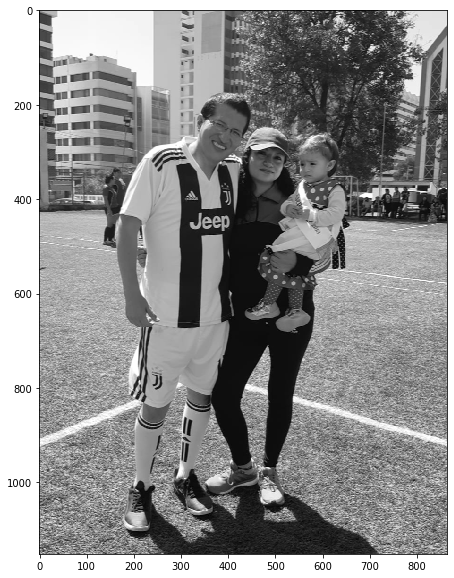

In [16]:
matriz_kernel_borde=np.asarray([[1,0,-1],[0,4,0],[-1,0,1]])
imagen_convolucion_bordes = generar_imagen_convolucion(imagen,matriz_kernel_borde)
fig,ax=plt.subplots(figsize=[10,10])
ax.imshow(imagen_convolucion_bordes,cmap=plt.cm.gray,interpolation='nearest')
plt.show()


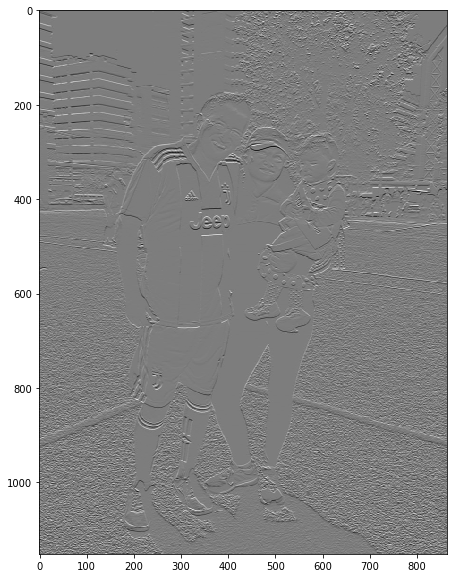

In [13]:
matriz_kernel_borde_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) 
imagen_convolucion_bordes = generar_imagen_convolucion(imagen,matriz_kernel_borde_vertical)
fig,ax=plt.subplots(figsize=[10,10])
ax.imshow(imagen_convolucion_bordes,cmap=plt.cm.gray,interpolation='nearest')
plt.show()

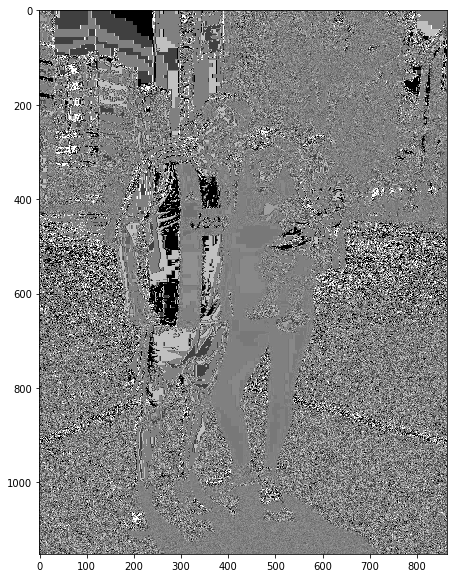

In [17]:
matriz_kernel_borde_horizontal = np.array([[1, 2, 1], [0, 0, 0],[-1, -2, -1]]) 
imagen_convolucion_bordes = generar_imagen_convolucion(imagen,matriz_kernel_borde_horizontal)
fig,ax=plt.subplots(figsize=[10,10])
ax.imshow(imagen_convolucion_bordes,cmap=plt.cm.gray,interpolation='nearest')
plt.show()